In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

In [3]:
data = pd.read_csv('emails.csv')

In [4]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [5]:
data.rename(columns = {"spam" : "label"}, inplace = True)

In [6]:
data

,text,label
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
def clean_text(text) :
    text = text.lower()
    text = re.sub(r'\b(subject|subject re:|subject:\s*re:?)\s*', '', text)
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [8]:
data.iloc[1].text

'Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no '

In [9]:
text1 = "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no"
text2 = clean_text(text1)
text2

'stock trading gunslinger fanny merrill muzo colza attainder penultimate like esmark perspicuous ramble segovia group try slung kansas tanzania yes chameleon continuant clothesman libretto chesapeake tight waterway herald hawthorn like chisel morristown superior deoxyribonucleic clockwork try hall incredible mcdougall yes hepburn einsteinian earmark sapling boar duane plain palfrey inflexible like huzzah pepperoni bedtime nameable attire try edt chronography optima yes pirogue diffusion albeit'

In [10]:
data['text'] = data['text'].apply(clean_text)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size = 0.2, random_state = 42)

In [35]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [31]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [24]:
TfidfVectorizer().get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [52]:
param_grid = {
    'tfidf__max_df' : [0.7, 0.8, 0.9],
    'tfidf__ngram_range' : [(1, 1), (1, 2)],
    'knn__n_neighbors' : [3, 5, 7, 9],
    'knn__weights' : ['uniform', 'distance']
}

In [53]:
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

In [54]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance'],
                         'tfidf__max_df': [0.7, 0.8, 0.9],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='accuracy')

In [55]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,param_tfidf__max_df,param_tfidf__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.583382,0.176582,0.769264,0.031635,3,uniform,0.7,"(1, 1)","{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.976009,0.978190,0.983624,0.977074,0.971616,0.977303,0.003868,22
1,4.446338,0.211615,1.058692,0.083980,3,uniform,0.7,"(1, 2)","{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.974918,0.981461,0.987991,0.980349,0.980349,0.981014,0.004170,4
2,1.117875,0.088175,0.591771,0.106402,3,uniform,0.8,"(1, 1)","{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.976009,0.978190,0.983624,0.977074,0.971616,0.977303,0.003868,22
3,3.839122,0.076369,0.914922,0.026604,3,uniform,0.8,"(1, 2)","{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.974918,0.981461,0.987991,0.980349,0.980349,0.981014,0.004170,4
4,0.969049,0.031394,0.511835,0.022898,3,uniform,0.9,"(1, 1)","{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.976009,0.978190,0.983624,0.977074,0.971616,0.977303,0.003868,22
5,3.671624,0.051800,1.045565,0.159094,3,uniform,0.9,"(1, 2)","{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.974918,0.981461,0.987991,0.980349,0.980349,0.981014,0.004170,4
6,0.932915,0.032878,0.466918,0.044513,3,distance,0.7,"(1, 1)","{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.979280,0.979280,0.984716,0.977074,0.973799,0.978830,0.003562,16
7,3.846606,0.056698,0.931918,0.031270,3,distance,0.7,"(1, 2)","{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.977099,0.982552,0.987991,0.980349,0.980349,0.981668,0.003609,1
8,0.932989,0.106828,0.539802,0.082511,3,distance,0.8,"(1, 1)","{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.979280,0.979280,0.984716,0.977074,0.973799,0.978830,0.003562,16
9,3.778760,0.052546,0.960847,0.106845,3,distance,0.8,"(1, 2)","{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.977099,0.982552,0.987991,0.980349,0.980349,0.981668,0.003609,1


In [67]:
grid_search.best_params_

{'knn__n_neighbors': 3,
 'knn__weights': 'distance',
 'tfidf__max_df': 0.7,
 'tfidf__ngram_range': (1, 2)}

In [56]:
y_pred = grid_search.predict(X_test)

In [71]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("classification report: ", classification_report(y_test, y_pred))

Accuracy:  0.981675392670157
classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       0.99      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146



In [63]:
def predict_spam(text) :
    cleaned_text = clean_text(text)
    prediction = grid_search.predict([cleaned_text])
    return "Spam" if prediction[0] == 1 else "Not Spam"

In [84]:
test_email = "congratulations!! you've won a $1000 gift card. click here to clain your prize now!"
print("prediction: ", predict_spam(test_email))

prediction:  Spam


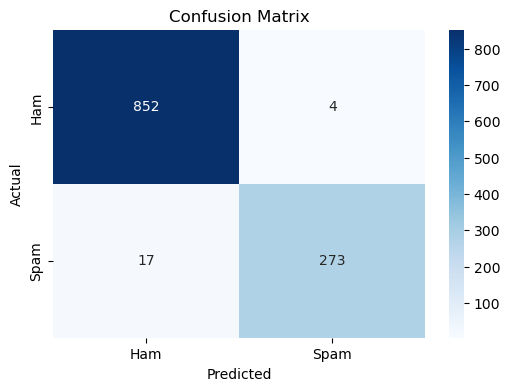

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

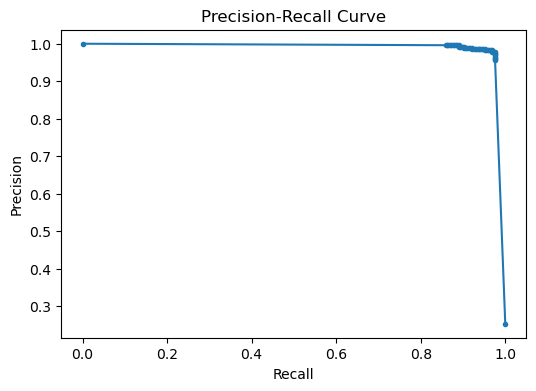

In [86]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, grid_search.predict_proba(X_test)[:, 1])

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()